<a href="https://www.kaggle.com/code/ehetshamshaukat/titanic-analysis-and-model?scriptVersionId=104661500" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
from plotly import graph_objs as go
from plotly import express as px
from plotly import offline

## Importing Data

In [2]:
dataset=pd.read_csv("/kaggle/input/titanic/train.csv")

## Reading Data

In [3]:
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C


## Preprocessing

In [4]:
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.225,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.000,F2,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.925,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.100,NaN,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.000,NaN,S


In [5]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
val=dataset["Age"].mean()
print(val)
dataset["Age"]=dataset["Age"].fillna(value=val).astype(int)
dataset["Embarked"]=dataset["Embarked"].fillna("S")

29.69911764705882


In [8]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [10]:
dataset.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
145,0,2,male,19,1,1,36.7500,S
837,0,3,male,29,0,0,8.0500,S
68,1,3,female,17,4,2,7.9250,S
314,0,2,male,43,1,1,26.2500,S
762,1,3,male,20,0,0,7.2292,C


In [11]:
dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Reuseable code

In [12]:
def create_pie(name,title,text):
    """ Creating Pie chart using plotly python"""
    labels=name.index
    values=name.values
    trace0=go.Pie(values=values,labels=labels,hole=0.4,textposition="inside",textinfo="label+percent+value")
    data=[trace0]
    layout=dict(title=title,title_x=0.5,annotations=[dict(text=text,x=0.5,y=0.5,showarrow=False,font_size=14)])
    fig=dict(layout=layout,data=data)
    offline.iplot(fig)

In [13]:
def create_sunburst(df,path:list,values,title):
    fig=px.sunburst(df,path=path,values=values)
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

## Basic analysis

In [14]:
dataset.shape

(891, 8)

In [15]:
dataset.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
143,0,3,male,19,0,0,6.7500,Q
274,1,3,female,29,0,0,7.7500,Q
103,0,3,male,33,0,0,8.6542,S
87,0,3,male,29,0,0,8.0500,S
704,0,3,male,26,1,0,7.8542,S


In [16]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [18]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
dataset.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Advance Analysis

In [20]:
dataset["Sex"].unique()

array(['male', 'female'], dtype=object)

In [21]:
gender=dataset["Sex"].value_counts(sort=True)
gender

male      577
female    314
Name: Sex, dtype: int64

In [22]:
create_pie(gender,"Gender Distribution","Gender")

In [23]:
gender_vs_survived=dataset.groupby(["Sex","Survived"]).agg(count=("Survived","count")).reset_index()
gender_vs_survived

,Sex,Survived,count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [24]:
create_sunburst(gender_vs_survived,["Sex","Survived","count"],"count","Gender Vs. Survived")

In [25]:
dataset.groupby(["Survived","Sex"]).agg(minimum_age=("Age","min"),maximum_age=("Age","max")).reset_index()

,Survived,Sex,minimum_age,maximum_age
0,0,female,2,57
1,0,male,1,74
2,1,female,0,63
3,1,male,0,80


In [26]:
dataset["Pclass"].unique()

array([3, 1, 2])

In [27]:
travel_class=dataset["Pclass"].value_counts(sort=True)
travel_class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
create_pie(travel_class,"Travel Class and Distribution","Class")

In [29]:
class_and_survived=dataset.groupby(["Pclass","Survived"]).agg(Survival_count=("Survived","count")).reset_index()
class_and_survived

,Pclass,Survived,Survival_count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [30]:
create_sunburst(class_and_survived,["Pclass","Survived","Survival_count"],"Survival_count","Class Vs. Survival Count.")

In [31]:
dataset["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
embarked=dataset["Embarked"].value_counts(sort=True)
embarked

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
create_pie(embarked,"Embarked","Location")

In [34]:
survived_or_not=dataset.groupby(["Survived","Embarked"]).agg(Survived_or_not=("Survived","count")).reset_index()
survived_or_not

,Survived,Embarked,Survived_or_not
0,0,C,75
1,0,Q,47
2,0,S,427
3,1,C,93
4,1,Q,30
5,1,S,219


In [35]:
create_sunburst(survived_or_not,["Survived","Embarked","Survived_or_not"],"Survived_or_not","Survived Status and Embarked Location")

# Machine learning

## Importing Libraries

In [36]:
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

## Importing Data

In [37]:
df=pd.read_csv("../input/titanic/train.csv")

## Reading Data

In [38]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.00,0,1,111361,57.9792,B18,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.00,2,0,3101276,7.9250,NaN,S


## preprocessing

In [39]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C


In [40]:
df.drop(["Name","Parch","SibSp","Ticket","Cabin","Fare"],axis=1,inplace=True)

In [41]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,Embarked
473,474,1,2,female,23.0,C
761,762,0,3,male,41.0,S
426,427,1,2,female,28.0,S
679,680,1,1,male,36.0,C
484,485,1,1,male,25.0,C


In [42]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
dtype: int64

In [43]:
val=df["Age"].mean()
df["Age"]=df["Age"].fillna(value=val).astype(int)

In [44]:
df["Embarked"]=df["Embarked"].fillna("S")

In [45]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,Embarked
327,328,1,2,female,36,S
797,798,1,3,female,31,S
889,890,1,1,male,26,C
286,287,1,3,male,30,S
160,161,0,3,male,44,S


In [46]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
dtype: int64

In [47]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [48]:
df=pd.get_dummies(df,columns=["Embarked"])

In [49]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
Embarked_C     uint8
Embarked_Q     uint8
Embarked_S     uint8
dtype: object

## Reuseable code

In [50]:
def evaluate_model(tst,pred):
    """ Model Evaluation using accuracy precision recall """
    acc=accuracy_score(tst,pred)
    print("Accuracy Score of model is:",acc)
    pre=precision_score(tst,pred)
    print("Precision Score of model is:",pre)
    re=recall_score(tst,pred)
    print("Recall Score of model is:",re)

In [51]:
def conmatdisplay(df,col,col1):
    con=ConfusionMatrixDisplay.from_predictions(df[col],df[col1])
    con

## Data splitting

In [52]:
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [54]:
xtrain.shape,xtest.shape

((712, 7), (179, 7))

In [55]:
ytrain.shape,ytest.shape

((712,), (179,))

## Model Training

In [56]:
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
lr.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [57]:
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

## Predicting 

In [58]:
lr=lr.predict(xtest)

In [59]:
knc=knc.predict(xtest)

## Comparing

In [60]:
com=pd.DataFrame({"Y_test":ytest,"Prediction using Logistics Regression":lr,"Prediction using KNC":knc})

In [61]:
com.sample(5)

,Y_test,Prediction using Logistics Regression,Prediction using KNC
151,1,1,0
158,0,0,0
249,0,0,0
252,0,0,0
499,0,0,0


## Evaluation

In [62]:
evaluate_model(com["Y_test"],com["Prediction using Logistics Regression"])

Accuracy Score of model is: 0.8156424581005587
Precision Score of model is: 0.8448275862068966
Recall Score of model is: 0.6712328767123288


In [63]:
evaluate_model(com["Y_test"],com["Prediction using KNC"])

Accuracy Score of model is: 0.5251396648044693
Precision Score of model is: 0.16666666666666666
Recall Score of model is: 0.0410958904109589


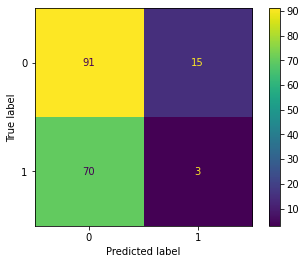

In [64]:
conmatdisplay(com,"Y_test","Prediction using KNC")

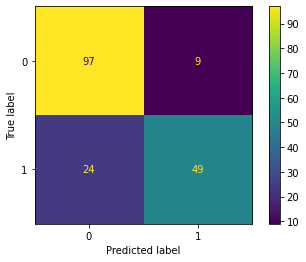

In [65]:
conmatdisplay(com,"Y_test","Prediction using Logistics Regression")